In [615]:
import json 
from pprint import pprint

import pandas as pd
import matplotlib.pyplot as plt
import graphviz

import numpy as np
from pandas.io.json import json_normalize

import math

### Converting Json --> Dataframe 

In [622]:
def extractDataInfo(filename):
    data = []
    attributes = []
    returnValues = []
    with open(filename) as f:
        for line in f:
            dataLine = json.loads(line)
            data.append(dataLine)
            for key in dataLine.keys():
                attributes.append(key)
        uniqueAttributes = set(attributes)
        returnValues.append(data)
        returnValues.append(uniqueAttributes)
        return returnValues

In [3]:
businessInfo = extractDataInfo('../dataset/business.json') #businessInfo is a list

In [4]:
businessDf = pd.DataFrame.from_dict(businessInfo[0])

In [5]:
originalDf = pd.DataFrame.from_dict(businessInfo[0]) #the original dataset 

### Summary of Raw Dataframe 

In [5]:
print(businessInfo[0][0])

{'business_id': 'YDf95gJZaq05wvo7hTQbbQ', 'name': 'Richmond Town Square', 'neighborhood': '', 'address': '691 Richmond Rd', 'city': 'Richmond Heights', 'state': 'OH', 'postal_code': '44143', 'latitude': 41.5417162, 'longitude': -81.4931165, 'stars': 2.0, 'review_count': 17, 'is_open': 1, 'attributes': {'RestaurantsPriceRange2': 2, 'BusinessParking': {'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}, 'BikeParking': True, 'WheelchairAccessible': True}, 'categories': ['Shopping', 'Shopping Centers'], 'hours': {'Monday': '10:00-21:00', 'Tuesday': '10:00-21:00', 'Friday': '10:00-21:00', 'Wednesday': '10:00-21:00', 'Thursday': '10:00-21:00', 'Sunday': '11:00-18:00', 'Saturday': '10:00-21:00'}}


In [6]:
businessDf.shape

(156639, 15)

Part II: Describe the Data 
The data type of each variable

In [7]:
businessDf.dtypes

address          object
attributes       object
business_id      object
categories       object
city             object
hours            object
is_open           int64
latitude        float64
longitude       float64
name             object
neighborhood     object
postal_code      object
review_count      int64
stars           float64
state            object
dtype: object

A brief description of what the variable contains (i.e. "The Tuition column contains information on the annual cost of tuition in $USD")
"business_id":string, 22 character unique string business id
"name":string, the business's name
"neighborhood": string, the neighborhood's name
"address": string, the full address of the business
"city": string, the city
"State": string, 2 character state code, if applicable
"postal code": string, the postal code
"latitude": float, latitude
"longitude": float, longitude
"stars": float, star rating, rounded to half-stars
"review_count": interger, number of reviews
"is_open": integer, 0 or 1 for closed or open, respectively
"attributes": object, business attributes to values. note: some attribute values might be objects
"categories": an array of strings of business categories
"hours":an object of key day to value hours, hours are using a 24hr clock
More description at https://www.yelp.com/dataset/documentation/json

Summarize the values as appropriate. Look at the min, max, and missing values. Do they make sense?

In [8]:
businessDf.describe()

,is_open,latitude,longitude,review_count,stars
count,156639.000000,156638.000000,156638.000000,156639.000000,156639.000000
mean,0.844375,38.585033,-92.856485,30.238159,3.647154
std,0.362501,5.399871,26.557741,96.486631,0.977640
min,0.000000,-36.086009,-142.466650,3.000000,1.000000
25%,1.000000,33.627161,-112.138207,4.000000,3.000000
50%,1.000000,36.142381,-89.523198,9.000000,3.500000
75%,1.000000,43.596845,-79.668760,23.000000,4.500000
max,1.000000,89.999314,115.086769,6979.000000,5.000000


### Unnesting Jsons --> Expanded DataFrame 

In [6]:
def unnestJson(dataframe):
    data = list(dataframe)
    return json_normalize(data)

In [7]:
openHoursDf = unnestJson(businessDf['hours']) #The dataframe with unnested open hours info 


In [8]:
attributesDf = unnestJson(businessDf['attributes']) #The dataframe with unnested attributes info 

### Looked At Missing Data to Clean / Condense dataset 

In [23]:
 def missingDataSummary(df):
    #dfInitial = pd.DataFrame(index = [df.name], columns =df.columns)
    dfInitial = df.iloc[0]
    for column in df.columns:
        #print("Column name: " + column )
        numNas = df[column].isnull().sum()
        numObservations = len(df[column])
        missingDataPercentage = numNas/numObservations *100
        dfInitial[column] = missingDataPercentage
        #print(str(missingDataPercentage) + "% missing") 
    return dfInitial

In [9]:
pd.set_option('display.max_columns', None)


In [11]:
missingAttributesDf = missingDataSummary(businessDf)
print(missingAttributesDf )

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


address                   0
attributes                0
business_id               0
categories                0
city                      0
hours                     0
is_open                   0
latitude        0.000638411
longitude       0.000638411
name                      0
neighborhood              0
postal_code               0
review_count              0
stars                     0
state                     0
Name: 0, dtype: object


### Combine Unnested Json Dataframes to --> businessDf

In [10]:
businessDf = pd.concat([businessDf, attributesDf], axis = 1, join = 'inner')

In [11]:
#merge two dataframes sidebyside by columns 
businessDf = pd.concat([businessDf, openHoursDf], axis=1, join='inner') 

In [ ]:
#find relationship between stars and review count perhaps 

### Figure out the counts by region -- To group by region & Delete insiginificant regions 

In [12]:
uniqueStates = businessDf['state'].unique()
statesCount = {}
for state in businessDf['state']:
    if(state in statesCount):
        statesCount[state] = statesCount[state]+1 
    else:
        statesCount[state] = 1; 
     

In [15]:
statesCount

{'01': 6,
 '3': 1,
 '75': 1,
 'ABE': 2,
 'AL': 2,
 'AZ': 47376,
 'BW': 3071,
 'BY': 4,
 'C': 32,
 'CA': 6,
 'DE': 1,
 'EDH': 3561,
 'ELN': 42,
 'ESX': 11,
 'FAL': 1,
 'FIF': 73,
 'FL': 1,
 'FLN': 1,
 'GLG': 1,
 'HH': 1,
 'HLD': 175,
 'IL': 1667,
 'KHL': 1,
 'MLN': 185,
 'NC': 11299,
 'NE': 1,
 'NI': 11,
 'NLK': 1,
 'NTH': 2,
 'NV': 30571,
 'NY': 15,
 'NYK': 42,
 'OH': 10930,
 'ON': 26520,
 'PA': 8916,
 'PKN': 1,
 'QC': 7273,
 'RCC': 1,
 'SC': 583,
 'SCB': 5,
 'SL': 1,
 'ST': 9,
 'STG': 1,
 'TAM': 1,
 'VT': 1,
 'WA': 3,
 'WHT': 1,
 'WI': 4190,
 'WLN': 36,
 'XGL': 2,
 'ZET': 1}

In [13]:
importantStatesCount = statesCount.copy()
for mapping in statesCount:
    if(importantStatesCount[mapping] < 500):
        del importantStatesCount[mapping]


In [14]:
importantStatesCount #will combine NC with SC 

{'AZ': 47376,
 'BW': 3071,
 'EDH': 3561,
 'IL': 1667,
 'NC': 11299,
 'NV': 30571,
 'OH': 10930,
 'ON': 26520,
 'PA': 8916,
 'QC': 7273,
 'SC': 583,
 'WI': 4190}

In [16]:
statesList = list(importantStatesCount.keys())

In [17]:
statesList

['OH', 'NC', 'ON', 'AZ', 'PA', 'NV', 'EDH', 'QC', 'WI', 'IL', 'BW', 'SC']

In [18]:
subsetBusinessDf = businessDf[businessDf['state'].isin(statesList)]

In [26]:
len(businessDf)

156639

In [27]:
len(subsetBusinessDf)

155957

In [19]:
subsetBusinessDf #The new cleaned dataset with delted regions 

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,AcceptsInsurance,AgesAllowed,Alcohol,Ambience.casual,Ambience.classy,Ambience.divey,Ambience.hipster,Ambience.intimate,Ambience.romantic,Ambience.touristy,Ambience.trendy,Ambience.upscale,BYOB,BYOBCorkage,BestNights.friday,BestNights.monday,BestNights.saturday,BestNights.sunday,BestNights.thursday,BestNights.tuesday,BestNights.wednesday,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,BusinessParking.garage,BusinessParking.lot,BusinessParking.street,BusinessParking.valet,BusinessParking.validated,ByAppointmentOnly,Caters,CoatCheck,Corkage,DietaryRestrictions.dairy-free,DietaryRestrictions.gluten-free,DietaryRestrictions.halal,DietaryRestrictions.kosher,DietaryRestrictions.soy-free,DietaryRestrictions.vegan,DietaryRestrictions.vegetarian,DogsAllowed,DriveThru,GoodForDancing,GoodForKids,GoodForMeal.breakfast,GoodForMeal.brunch,GoodForMeal.dessert,GoodForMeal.dinner,GoodForMeal.latenight,GoodForMeal.lunch,HairSpecializesIn.africanamerican,HairSpecializesIn.asian,HairSpecializesIn.coloring,HairSpecializesIn.curly,HairSpecializesIn.extensions,HairSpecializesIn.kids,HairSpecializesIn.perms,HairSpecializesIn.straightperms,HappyHour,HasTV,Music.background_music,Music.dj,Music.jukebox,Music.karaoke,Music.live,Music.no_music,Music.video,NoiseLevel,Open24Hours,OutdoorSeating,RestaurantsAttire,RestaurantsCounterService,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,691 Richmond Rd,"{'RestaurantsPriceRange2': 2, 'BusinessParking...",YDf95gJZaq05wvo7hTQbbQ,"[Shopping, Shopping Centers]",Richmond Heights,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",1,41.541716,-81.493116,Richmond Town Square,,44143,17,2.0,OH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,False,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,True,NaN,10:00-21:00,10:00-21:00,10:00-21:00,11:00-18:00,10:00-21:00,10:00-21:00,10:00-21:00
1,2824 Milton Rd,"{'GoodForMeal': {'dessert': False, 'latenight'...",mLwM-h2YhXl2NCgdS84_Bw,"[Food, Soul Food, Convenience Stores, Restaura...",Charlotte,"{'Monday': '10:00-22:00', 'Tuesday': '10:00-22...",0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,average,NaN,False,casual,NaN,True,True,2.0,False,NaN,True,NaN,NaN,NaN,10:00-22:00,10:00-22:00,10:00-22:00,10:00-22:00,10:00-22:00,10:00-22:00,10:00-22:00
2,337 Danforth Avenue,"{'BusinessParking': {'garage': False, 'street'...",v2WhjAB3PIBA8J8VxG3wEg,"[Food, Coffee & Tea]",Toronto,"{'Monday': '10:00-19:00', 'Tuesday': '10:00-19...",0,43.677126,-79.353285,The Tea Emporium,Riverdale,M4K 1N7,7,4.5,ON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,True,False,False,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,True,no,10:00-19:00,10:00-19:00,10:00-18:00,12:00-17:00,10:00-19:00,10:00-19:00,10:00-19:00
3,"7702 E Doubletree Ranch Rd, Ste 300",{},CVtCbSB1zUcUWg-9TNGTuQ,"[Professional Services, Matchmakers]",Scottsdale,"{'Friday': '9:00-17:00', 'Tuesday': '9:00-17:0...",1,33.565082,-111.916400,TRUmatch,,85258,3,

### Summarize Missing Info data of new dataset & compare with original 

In [22]:
missingDataSummary(originalDf)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


address                   0
attributes                0
business_id               0
categories                0
city                      0
hours                     0
is_open                   0
latitude        0.000638411
longitude       0.000638411
name                      0
neighborhood              0
postal_code               0
review_count              0
stars                     0
state                     0
Name: 0, dtype: object

In [24]:
missingSubsetInfo = missingDataSummary(subsetBusinessDf)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [24]:
missingSubsetInfo

address                                0
attributes                             0
business_id                            0
categories                             0
city                                   0
hours                                  0
is_open                                0
latitude                     0.000641202
longitude                    0.000641202
name                                   0
neighborhood                           0
postal_code                            0
review_count                           0
stars                                  0
state                                  0
AcceptsInsurance                 94.5036
AgesAllowed                      99.7467
Alcohol                          71.7717
Ambience.casual                  72.6046
Ambience.classy                  72.6046
Ambience.divey                   82.5772
Ambience.hipster                 72.6046
Ambience.intimate                72.6046
Ambience.romantic                72.6046
Ambience.tourist

In [25]:
subsetMissingDf = pd.DataFrame(missingSubsetInfo)

In [26]:
subsetMissingDf = subsetMissingDf.T #to switch rows to columns 
subsetMissingDf

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,AcceptsInsurance,AgesAllowed,Alcohol,Ambience.casual,Ambience.classy,Ambience.divey,Ambience.hipster,Ambience.intimate,Ambience.romantic,Ambience.touristy,Ambience.trendy,Ambience.upscale,BYOB,BYOBCorkage,BestNights.friday,BestNights.monday,BestNights.saturday,BestNights.sunday,BestNights.thursday,BestNights.tuesday,BestNights.wednesday,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,BusinessParking.garage,BusinessParking.lot,BusinessParking.street,BusinessParking.valet,BusinessParking.validated,ByAppointmentOnly,Caters,CoatCheck,Corkage,DietaryRestrictions.dairy-free,DietaryRestrictions.gluten-free,DietaryRestrictions.halal,DietaryRestrictions.kosher,DietaryRestrictions.soy-free,DietaryRestrictions.vegan,DietaryRestrictions.vegetarian,DogsAllowed,DriveThru,GoodForDancing,GoodForKids,GoodForMeal.breakfast,GoodForMeal.brunch,GoodForMeal.dessert,GoodForMeal.dinner,GoodForMeal.latenight,GoodForMeal.lunch,HairSpecializesIn.africanamerican,HairSpecializesIn.asian,HairSpecializesIn.coloring,HairSpecializesIn.curly,HairSpecializesIn.extensions,HairSpecializesIn.kids,HairSpecializesIn.perms,HairSpecializesIn.straightperms,HappyHour,HasTV,Music.background_music,Music.dj,Music.jukebox,Music.karaoke,Music.live,Music.no_music,Music.video,NoiseLevel,Open24Hours,OutdoorSeating,RestaurantsAttire,RestaurantsCounterService,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,0,0,0,0,0.000641202,0.000641202,0,0,0,0,0,0,94.5036,99.7467,71.7717,72.6046,72.6046,82.5772,72.6046,72.6046,72.6046,72.6046,72.6046,72.6046,99.4197,99.1023,95.9149,95.9149,95.9149,95.9149,95.9149,95.9149,95.9149,53.0024,94.3157,22.8313,42.8336,42.8336,42.8336,42.8336,44.1102,77.7131,77.8997,94.9172,99.5819,99.8435,99.8435,99.8435,99.8435,99.8435,99.8435,99.8435,92.832,96.1355,94.5632,62.7282,72.563,72.563,72.563,72.563,72.563,72.563,99.2472,99.2472,99.0998,99.0998,99.0998,99.0998,99.0998,99.2472,94.6351,72.091,94.8838,94.8838,94.8838,94.8838,94.8838,94.8838,94.8838,74.0377,99.7775,67.8931,71.387,99.7461,70.1129,68.356,38.5113,70.3104,74.4648,65.1032,95.1044,71.8557,72.268,27.4916,32.5571,35.3155,51.9688,27.2158,28.2193,27.5076


In [27]:
len(subsetMissingDf.iloc[0])

103

 ### Delete Attribute columns that have more than 90% of its data missing 

In [28]:
columnIndex = 0; 
delCols = []
for column in subsetMissingDf.columns:
    if(subsetMissingDf[column][0] > 90):
        print('Greater than 90!')
        print(column )
        delCols.append(column)
        print(columnIndex)
    columnIndex = columnIndex + 1

    #print(column)
    #print(type(column))
    #print(subsetMissingDf[column][0])

Greater than 90!
AcceptsInsurance
15
Greater than 90!
AgesAllowed
16
Greater than 90!
BYOB
27
Greater than 90!
BYOBCorkage
28
Greater than 90!
BestNights.friday
29
Greater than 90!
BestNights.monday
30
Greater than 90!
BestNights.saturday
31
Greater than 90!
BestNights.sunday
32
Greater than 90!
BestNights.thursday
33
Greater than 90!
BestNights.tuesday
34
Greater than 90!
BestNights.wednesday
35
Greater than 90!
BusinessAcceptsBitcoin
37
Greater than 90!
CoatCheck
46
Greater than 90!
Corkage
47
Greater than 90!
DietaryRestrictions.dairy-free
48
Greater than 90!
DietaryRestrictions.gluten-free
49
Greater than 90!
DietaryRestrictions.halal
50
Greater than 90!
DietaryRestrictions.kosher
51
Greater than 90!
DietaryRestrictions.soy-free
52
Greater than 90!
DietaryRestrictions.vegan
53
Greater than 90!
DietaryRestrictions.vegetarian
54
Greater than 90!
DogsAllowed
55
Greater than 90!
DriveThru
56
Greater than 90!
GoodForDancing
57
Greater than 90!
HairSpecializesIn.africanamerican
65
Greate

In [29]:
delCols

['AcceptsInsurance',
 'AgesAllowed',
 'BYOB',
 'BYOBCorkage',
 'BestNights.friday',
 'BestNights.monday',
 'BestNights.saturday',
 'BestNights.sunday',
 'BestNights.thursday',
 'BestNights.tuesday',
 'BestNights.wednesday',
 'BusinessAcceptsBitcoin',
 'CoatCheck',
 'Corkage',
 'DietaryRestrictions.dairy-free',
 'DietaryRestrictions.gluten-free',
 'DietaryRestrictions.halal',
 'DietaryRestrictions.kosher',
 'DietaryRestrictions.soy-free',
 'DietaryRestrictions.vegan',
 'DietaryRestrictions.vegetarian',
 'DogsAllowed',
 'DriveThru',
 'GoodForDancing',
 'HairSpecializesIn.africanamerican',
 'HairSpecializesIn.asian',
 'HairSpecializesIn.coloring',
 'HairSpecializesIn.curly',
 'HairSpecializesIn.extensions',
 'HairSpecializesIn.kids',
 'HairSpecializesIn.perms',
 'HairSpecializesIn.straightperms',
 'HappyHour',
 'Music.background_music',
 'Music.dj',
 'Music.jukebox',
 'Music.karaoke',
 'Music.live',
 'Music.no_music',
 'Music.video',
 'Open24Hours',
 'RestaurantsCounterService',
 'Smoking

In [30]:
newSubsetDf = subsetMissingDf.drop( delCols, axis=1) # clean 90% or more missing data

In [31]:
len(newSubsetDf.iloc[0])

60

In [32]:
newSubsetDf

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,Alcohol,Ambience.casual,Ambience.classy,Ambience.divey,Ambience.hipster,Ambience.intimate,Ambience.romantic,Ambience.touristy,Ambience.trendy,Ambience.upscale,BikeParking,BusinessAcceptsCreditCards,BusinessParking.garage,BusinessParking.lot,BusinessParking.street,BusinessParking.valet,BusinessParking.validated,ByAppointmentOnly,Caters,GoodForKids,GoodForMeal.breakfast,GoodForMeal.brunch,GoodForMeal.dessert,GoodForMeal.dinner,GoodForMeal.latenight,GoodForMeal.lunch,HasTV,NoiseLevel,OutdoorSeating,RestaurantsAttire,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,WheelchairAccessible,WiFi,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,0,0,0,0,0.000641202,0.000641202,0,0,0,0,0,0,71.7717,72.6046,72.6046,82.5772,72.6046,72.6046,72.6046,72.6046,72.6046,72.6046,53.0024,22.8313,42.8336,42.8336,42.8336,42.8336,44.1102,77.7131,77.8997,62.7282,72.563,72.563,72.563,72.563,72.563,72.563,72.091,74.0377,67.8931,71.387,70.1129,68.356,38.5113,70.3104,74.4648,65.1032,71.8557,72.268,27.4916,32.5571,35.3155,51.9688,27.2158,28.2193,27.5076


In [98]:
len(businessDf)

156639

In [33]:
businessDf =  businessDf.drop( delCols, axis=1) # clean 90% or more missing data

In [34]:
len(businessDf)

156639

In [35]:
businessDf.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,Alcohol,Ambience.casual,Ambience.classy,Ambience.divey,Ambience.hipster,Ambience.intimate,Ambience.romantic,Ambience.touristy,Ambience.trendy,Ambience.upscale,BikeParking,BusinessAcceptsCreditCards,BusinessParking.garage,BusinessParking.lot,BusinessParking.street,BusinessParking.valet,BusinessParking.validated,ByAppointmentOnly,Caters,GoodForKids,GoodForMeal.breakfast,GoodForMeal.brunch,GoodForMeal.dessert,GoodForMeal.dinner,GoodForMeal.latenight,GoodForMeal.lunch,HasTV,NoiseLevel,OutdoorSeating,RestaurantsAttire,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,WheelchairAccessible,WiFi,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,691 Richmond Rd,"{'RestaurantsPriceRange2': 2, 'BusinessParking...",YDf95gJZaq05wvo7hTQbbQ,"[Shopping, Shopping Centers]",Richmond Heights,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",1,41.541716,-81.493116,Richmond Town Square,,44143,17,2.0,OH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,False,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,True,NaN,10:00-21:00,10:00-21:00,10:00-21:00,11:00-18:00,10:00-21:00,10:00-21:00,10:00-21:00
1,2824 Milton Rd,"{'GoodForMeal': {'dessert': False, 'latenight'...",mLwM-h2YhXl2NCgdS84_Bw,"[Food, Soul Food, Convenience Stores, Restaura...",Charlotte,"{'Monday': '10:00-22:00', 'Tuesday': '10:00-22...",0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC,NaN,False,False,False,False,False,False,False,False,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,average,False,casual,True,True,2.0,False,NaN,True,NaN,NaN,10:00-22:00,10:00-22:00,10:00-22:00,10:00-22:00,10:00-22:00,10:00-22:00,10:00-22:00
2,337 Danforth Avenue,"{'BusinessParking': {'garage': False, 'street'...",v2WhjAB3PIBA8J8VxG3wEg,"[Food, Coffee & Tea]",Toronto,"{'Monday': '10:00-19:00', 'Tuesday': '10:00-19...",0,43.677126,-79.353285,The Tea Emporium,Riverdale,M4K 1N7,7,4.5,ON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,False,False,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,2.0,NaN,NaN,NaN,True,no,10:00-19:00,10:00-19:00,10:00-18:00,12:00-17:00,10:00-19:00,10:00-19:00,10:00-19:00
3,"7702 E Doubletree Ranch Rd, Ste 300",{},CVtCbSB1zUcUWg-9TNGTuQ,"[Professional Services, Matchmakers]",Scottsdale,"{'Friday': '9:00-17:00', 'Tuesday': '9:00-17:0...",1,33.565082,-111.916400,TRUmatch,,85258,3,3.0,AZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:00-17:00,9:00-17:00,NaN,NaN,9:00-17:00,9:00-17:00,9:00-17:00
4,4719 N 20Th St,"{'RestaurantsTableService': False, 'GoodForMea...",duHFBe87uNSXImQmvBh87Q,"[Sandwiches, Restaurants]",Phoenix,{},0,33.505928,-112.038847,Blimpie,,85016,10,4.5,AZ,none,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,NaN,True,True,False,False,False,False,False,False,False,quiet,False,casual,False,True,1.0,False,False,True,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking if the ratios & dataset has any overlapping columns to delete

In [36]:
dataRatio = {}
for column in newSubsetDf.columns: 
    if newSubsetDf[column][0] in dataRatio:
        dataRatio[newSubsetDf[column][0]].append(column)
    else: 
        dataRatio[newSubsetDf[column][0]] = [column]

In [37]:
dataRatio

{0.0: ['address',
  'attributes',
  'business_id',
  'categories',
  'city',
  'hours',
  'is_open',
  'name',
  'neighborhood',
  'postal_code',
  'review_count',
  'stars',
  'state'],
 0.00064120238270805416: ['latitude', 'longitude'],
 22.831293241085685: ['BusinessAcceptsCreditCards'],
 27.21583513404336: ['Thursday'],
 27.491552158607824: ['Friday'],
 27.507582218175525: ['Wednesday'],
 28.219316862981465: ['Tuesday'],
 32.557050982001449: ['Monday'],
 35.315503632411499: ['Saturday'],
 38.51125630782844: ['RestaurantsPriceRange2'],
 42.833601569663429: ['BusinessParking.garage',
  'BusinessParking.lot',
  'BusinessParking.street',
  'BusinessParking.valet'],
 44.110235513635168: ['BusinessParking.validated'],
 51.968811916105082: ['Sunday'],
 53.002430157030467: ['BikeParking'],
 62.728187897946228: ['GoodForKids'],
 65.10320152349685: ['RestaurantsTakeOut'],
 67.893073090659612: ['OutdoorSeating'],
 68.356021210974816: ['RestaurantsGoodForGroups'],
 70.112915739594882: ['Restau

In [41]:
parkingAttr = dataRatio[42.833601569663429]

In [42]:
mealAttr = dataRatio[72.562950043922356]

In [53]:
ambienceAttr = dataRatio[72.60462819879838]

In [49]:
parkingDf = businessDf[parkingAttr]

parkingDf

,BusinessParking.garage,BusinessParking.lot,BusinessParking.street,BusinessParking.valet
0,False,True,False,False
1,NaN,NaN,NaN,NaN
2,False,False,True,False
3,NaN,NaN,NaN,NaN
4,False,False,False,False
5,False,True,False,False
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,False,True,False,False
9,NaN,NaN,NaN,NaN


In [50]:
mealDf = businessDf[mealAttr]

mealDf

,GoodForMeal.breakfast,GoodForMeal.brunch,GoodForMeal.dessert,GoodForMeal.dinner,GoodForMeal.latenight,GoodForMeal.lunch
0,NaN,NaN,NaN,NaN,NaN,NaN
1,False,False,False,False,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,False,False,False,False,False,False
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
ambienceDf = businessDf[ambienceAttr]

ambienceDf

,Ambience.casual,Ambience.classy,Ambience.hipster,Ambience.intimate,Ambience.romantic,Ambience.touristy,Ambience.trendy,Ambience.upscale
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,False,False,False,False,False,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,False,False,False,False,False,False,False
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dividing Dataframe by Region 

In [100]:
businessDf = businessDf.drop(['address', 'attributes', 'hours'], axis = 1)

In [128]:
businessDf.head()

,business_id,categories,city,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,Alcohol,Ambience.casual,Ambience.classy,Ambience.divey,Ambience.hipster,Ambience.intimate,Ambience.romantic,Ambience.touristy,Ambience.trendy,Ambience.upscale,BikeParking,BusinessAcceptsCreditCards,BusinessParking.garage,BusinessParking.lot,BusinessParking.street,BusinessParking.valet,BusinessParking.validated,ByAppointmentOnly,Caters,GoodForKids,GoodForMeal.breakfast,GoodForMeal.brunch,GoodForMeal.dessert,GoodForMeal.dinner,GoodForMeal.latenight,GoodForMeal.lunch,HasTV,NoiseLevel,OutdoorSeating,RestaurantsAttire,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,WheelchairAccessible,WiFi,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,YDf95gJZaq05wvo7hTQbbQ,"[Shopping, Shopping Centers]",Richmond Heights,1,41.541716,-81.493116,Richmond Town Square,,44143,17,2.0,OH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,False,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,True,NaN,10:00-21:00,10:00-21:00,10:00-21:00,11:00-18:00,10:00-21:00,10:00-21:00,10:00-21:00
1,mLwM-h2YhXl2NCgdS84_Bw,"[Food, Soul Food, Convenience Stores, Restaura...",Charlotte,0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC,NaN,False,False,False,False,False,False,False,False,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,average,False,casual,True,True,2.0,False,NaN,True,NaN,NaN,10:00-22:00,10:00-22:00,10:00-22:00,10:00-22:00,10:00-22:00,10:00-22:00,10:00-22:00
2,v2WhjAB3PIBA8J8VxG3wEg,"[Food, Coffee & Tea]",Toronto,0,43.677126,-79.353285,The Tea Emporium,Riverdale,M4K 1N7,7,4.5,ON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,False,False,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,2.0,NaN,NaN,NaN,True,no,10:00-19:00,10:00-19:00,10:00-18:00,12:00-17:00,10:00-19:00,10:00-19:00,10:00-19:00
3,CVtCbSB1zUcUWg-9TNGTuQ,"[Professional Services, Matchmakers]",Scottsdale,1,33.565082,-111.916400,TRUmatch,,85258,3,3.0,AZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:00-17:00,9:00-17:00,NaN,NaN,9:00-17:00,9:00-17:00,9:00-17:00
4,duHFBe87uNSXImQmvBh87Q,"[Sandwiches, Restaurants]",Phoenix,0,33.505928,-112.038847,Blimpie,,85016,10,4.5,AZ,none,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,NaN,True,True,False,False,False,False,False,False,False,quiet,False,casual,False,True,1.0,False,False,True,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
ohDf = businessDf.loc[businessDf['state'] == 'OH'].reset_index()
ncDf = businessDf.loc[businessDf['state'] == 'NC'].reset_index()
onDf = businessDf.loc[businessDf['state'] == 'ON'].reset_index()
azDf = businessDf.loc[businessDf['state'] == 'AZ'].reset_index()
paDf = businessDf.loc[businessDf['state'] == 'PA'].reset_index()
nvDf = businessDf.loc[businessDf['state'] == 'NV'].reset_index()
edhDf = businessDf.loc[businessDf['state'] == 'EDH'].reset_index()
qcDf = businessDf.loc[businessDf['state'] == 'QC'].reset_index()
wiDf = businessDf.loc[businessDf['state'] == 'WI'].reset_index()
ilDf = businessDf.loc[businessDf['state'] == 'IL'].reset_index()
bwDf = businessDf.loc[businessDf['state'] == 'BW'].reset_index()
scDf = businessDf.loc[businessDf['state'] == 'SC'].reset_index()

In [160]:
carolinaDf = ncDf.append(scDf)
centralDf = wiDf.append(ilDf)

In [161]:
statesDataFrames = [ohDf, carolinaDf, onDf, azDf, paDf, nvDf, edhDf, qcDf, centralDf, bwDf]

In [162]:
for statesDf in statesDataFrames:
    statesDf = statesDf.reset_index()
    print("This state has..." + statesDf['state'].unique())
    print(len(statesDf))
    

['This state has...OH']
10930
['This state has...NC' 'This state has...SC']
11882
['This state has...ON']
26520
['This state has...AZ']
47376
['This state has...PA']
8916
['This state has...NV']
30571
['This state has...EDH']
3561
['This state has...QC']
7273
['This state has...WI' 'This state has...IL']
5857
['This state has...BW']
3071


### Creating a Sample Decision tree with Ohio Dataframe - Part I: Cleaning the Ohio Dataframe with relevant information 

In [424]:
missingohDf = missingDataSummary(ohDf)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressorfrom sklearn.metrics import confusion_matrix, mean_squared_error

In [469]:
ohDfPractice = ohDf.drop( [ 'postal_code','city', 'business_id', 'state', 'name', 'neighborhood', 'categories', 'Friday', 'Monday','Tuesday', 'Wednesday','Thursday', 'Saturday', 'Sunday'], axis  =1)

In [ ]:
ohDfdelCols = []
for column in missingohDf.columns:
    if(missingohDf[column][0] > 40):
        delCols.append(column)
 

In [431]:
 ohDfPractice.head()

,index,is_open,latitude,longitude,review_count,stars,Alcohol,Ambience.casual,Ambience.classy,Ambience.divey,Ambience.hipster,Ambience.intimate,Ambience.romantic,Ambience.touristy,Ambience.trendy,Ambience.upscale,BikeParking,BusinessAcceptsCreditCards,BusinessParking.garage,BusinessParking.lot,BusinessParking.street,BusinessParking.valet,BusinessParking.validated,ByAppointmentOnly,Caters,GoodForKids,GoodForMeal.breakfast,GoodForMeal.brunch,GoodForMeal.dessert,GoodForMeal.dinner,GoodForMeal.latenight,GoodForMeal.lunch,HasTV,NoiseLevel,OutdoorSeating,RestaurantsAttire,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,WheelchairAccessible,WiFi
0,0,1,41.541716,-81.493116,17,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,False,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,True,NaN
1,17,1,41.501820,-81.536776,25,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18,1,41.509408,-81.662162,162,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,False,True,False,False,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,1.0,NaN,NaN,True,True,free
3,30,1,41.459468,-81.858738,18,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,True,False,False,False,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
4,37,1,41.499487,-81.494179,25,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN


In [470]:
ohDfPractice['WiFi'].fillna('no', inplace = True)

ohDfPractice['WiFi'] = ohDfPractice['WiFi'].replace(['paid'], ['free'])

ohDfPractice['WiFi'] = ohDfPractice['WiFi'].map({'free':1, 'no':0})

In [471]:
ohDfPractice['stars'] = ohDfPractice.stars.map(lambda x : 1 if x >= 3 else 0)

In [472]:
ohDfPractice['Alcohol'].fillna('none', inplace = True)
ohDfPractice['Alcohol'] = ohDfPractice['Alcohol'].replace(['beer_and_wine'], ['full_bar'])
ohDfPractice['Alcohol'] = ohDfPractice['Alcohol'].map({'full_bar':1, 'none':0})

In [473]:
ohDfPractice['NoiseLevel'].fillna('quiet', inplace = True)
ohDfPractice['NoiseLevel'] = ohDfPractice['NoiseLevel'].replace(['average', 'very_loud'], ['quiet', 'loud'])
ohDfPractice['NoiseLevel'] = ohDfPractice['NoiseLevel'].map({'loud':1, 'quiet':0})

In [474]:
ohDfPractice['RestaurantsAttire'].fillna('casual', inplace = True)
ohDfPractice['RestaurantsAttire'] = ohDfPractice['RestaurantsAttire'].replace(['dressy'], ['formal'])
ohDfPractice['RestaurantsAttire'] = ohDfPractice['RestaurantsAttire'].map({'formal':1, 'casual':0})

In [475]:
ohDfPractice['RestaurantsPriceRange2'].fillna(0.0, inplace = True)

In [476]:
ohDfPractice = ohDfPractice.drop( [ 'index', 'latitude', 'longitude'], axis  =1)

In [490]:
ohMissingDf = missingDataSummary(ohDfPractice)

ohMissingDf = pd.DataFrame(ohMissingDf)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [492]:
ohMissingDf = ohMissingDf.T

In [493]:
ohMissingDf

,is_open,review_count,stars,Alcohol,Ambience.casual,Ambience.classy,Ambience.divey,Ambience.hipster,Ambience.intimate,Ambience.romantic,Ambience.touristy,Ambience.trendy,Ambience.upscale,BikeParking,BusinessAcceptsCreditCards,BusinessParking.garage,BusinessParking.lot,BusinessParking.street,BusinessParking.valet,BusinessParking.validated,ByAppointmentOnly,Caters,GoodForKids,GoodForMeal.breakfast,GoodForMeal.brunch,GoodForMeal.dessert,GoodForMeal.dinner,GoodForMeal.latenight,GoodForMeal.lunch,HasTV,NoiseLevel,OutdoorSeating,RestaurantsAttire,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,WheelchairAccessible,WiFi
0,0,0,0,0,64.8673,64.8673,64.8673,64.8673,64.8673,64.8673,64.8673,64.8673,64.8673,47.2004,17.0448,35.4346,35.4346,35.4346,35.4346,35.4346,85.1052,71.9122,54.6478,65.7182,65.7182,65.7182,65.7182,65.7182,65.7182,64.3184,0,60.5489,0,61.6468,60.2104,0,61.7841,67.301,56.0842,71.4273,0


In [495]:
ohDel60Cols = []
for column in ohMissingDf.columns:
    if(ohMissingDf[column][0] > 60):
        ohDel60Cols.append(column)
      

In [501]:
ohDel60Cols

['Ambience.casual',
 'Ambience.classy',
 'Ambience.divey',
 'Ambience.hipster',
 'Ambience.intimate',
 'Ambience.romantic',
 'Ambience.touristy',
 'Ambience.trendy',
 'Ambience.upscale',
 'ByAppointmentOnly',
 'Caters',
 'GoodForMeal.breakfast',
 'GoodForMeal.brunch',
 'GoodForMeal.dessert',
 'GoodForMeal.dinner',
 'GoodForMeal.latenight',
 'GoodForMeal.lunch',
 'HasTV',
 'OutdoorSeating',
 'RestaurantsDelivery',
 'RestaurantsGoodForGroups',
 'RestaurantsReservations',
 'RestaurantsTableService',
 'WheelchairAccessible']

In [506]:
ohDfPractice = ohDfPractice.drop(ohDel60Cols, axis  =1) 

### Part 2: Merging the Parking dataset

In [507]:
ohDfPractice.head()

,is_open,review_count,stars,Alcohol,BikeParking,BusinessAcceptsCreditCards,BusinessParking.garage,BusinessParking.lot,BusinessParking.street,BusinessParking.valet,BusinessParking.validated,GoodForKids,NoiseLevel,RestaurantsAttire,RestaurantsPriceRange2,RestaurantsTakeOut,WiFi
0,1,17,0,0,True,NaN,False,True,False,False,False,NaN,0,0,2.0,NaN,0
1,1,25,1,0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN,0
2,1,162,1,0,True,True,False,True,False,False,False,NaN,0,0,1.0,True,1
3,1,18,0,0,NaN,True,False,True,False,False,False,True,0,0,3.0,NaN,0
4,1,25,1,0,True,True,False,False,False,False,False,NaN,0,0,3.0,NaN,0


In [510]:
parkingCols = []
for column in ohDfPractice.columns:
    if "BusinessParking" in column:
        parkingCols.append(column)

In [512]:
ohParkingDf = ohDfPractice[parkingCols]

In [530]:
parkingList = []
for i in range(len(ohParkingDf)):
    if((ohParkingDf.iloc[i] == True).any()):
        parkingList.append(True)
    else:
        parkingList.append(False)

In [541]:
newOhParkingDf = pd.DataFrame(parkingList)
newOhParkingDf.columns = ['Parking']

In [545]:
ohDfPractice = pd.concat([ohDfPractice, newOhParkingDf], axis = 1, join = 'inner')

In [549]:
ohDfPractice = ohDfPractice.drop(parkingCols, axis = 1)

In [550]:
ohDfPractice.head()

,is_open,review_count,stars,Alcohol,BikeParking,BusinessAcceptsCreditCards,GoodForKids,NoiseLevel,RestaurantsAttire,RestaurantsPriceRange2,RestaurantsTakeOut,WiFi,Parking
0,1,17,0,0,True,NaN,NaN,0,0,2.0,NaN,0,True
1,1,25,1,0,NaN,True,NaN,0,0,0.0,NaN,0,False
2,1,162,1,0,True,True,NaN,0,0,1.0,True,1,True
3,1,18,0,0,NaN,True,True,0,0,3.0,NaN,0,True
4,1,25,1,0,True,True,NaN,0,0,3.0,NaN,0,False


### Part 3: Cleaning more data with string Nan values 

In [556]:
for column in ohDfPractice.columns:
    print ("this is my column: "+column)
    print(ohDfPractice[column].unique())
    

this is my column: is_open
[1 0]
this is my column: review_count
[ 17  25 162  18   3  26   7   5  13   8   9  22   4  27  10  24   6  39
  49  70  99  76  19 113  20  40  16  11 118  50  15  55  87  66  35 361
 723  31  62  32  29  71  14  42  36  89 381  44  30 137  94  63  45 117
 108  53  12 105  21 115  79  60  47 160  46  28  93  57  23 121  81  43
 268  69  33  41  58  34  74 231 278  38 253 106 129 109  91  59  54 140
 131  85  37  80 192  67 149 202  82  65 252  86 104  56  95  77 107 100
 101 188  48  96 130  75 305  61  68 226  72 378 164 110 166 102 120  52
 152  90 245 206  51 122 235  98 133 326 151 157 148  83 178 335 159 373
  64 896  88 222 123 153 126  84  78 147 342 135 132 214 124 187 182 163
 155 128  73  97 119 317 103 203 204 127 125 197 419 114 311 243 144 189
 136 458 230 150 158 211 183 244 316 112 509 224 336 116 852 172 145 169
 459 207 134 514 217 200 205 357 228 170 154 229 258 161 356 551 275 156
 181 143 176 455 138 223 227 261 236 662 271 465 242 280  9

In [557]:
nanOhCols = ['BikeParking', 'BusinessAcceptsCreditCards', 'GoodForKids','RestaurantsTakeOut','Parking' ]

In [558]:
for column in nanOhCols:
    ohDfPractice[column].fillna(False, inplace = True)
    ohDfPractice[column] = ohDfPractice[column].map({False : 0, True: 1})

In [559]:
#Last Check to see if ohDfPractice has been cleaned
for column in ohDfPractice.columns:
    print ("this is my column: "+column)
    print(ohDfPractice[column].unique())


this is my column: is_open
[1 0]
this is my column: review_count
[ 17  25 162  18   3  26   7   5  13   8   9  22   4  27  10  24   6  39
  49  70  99  76  19 113  20  40  16  11 118  50  15  55  87  66  35 361
 723  31  62  32  29  71  14  42  36  89 381  44  30 137  94  63  45 117
 108  53  12 105  21 115  79  60  47 160  46  28  93  57  23 121  81  43
 268  69  33  41  58  34  74 231 278  38 253 106 129 109  91  59  54 140
 131  85  37  80 192  67 149 202  82  65 252  86 104  56  95  77 107 100
 101 188  48  96 130  75 305  61  68 226  72 378 164 110 166 102 120  52
 152  90 245 206  51 122 235  98 133 326 151 157 148  83 178 335 159 373
  64 896  88 222 123 153 126  84  78 147 342 135 132 214 124 187 182 163
 155 128  73  97 119 317 103 203 204 127 125 197 419 114 311 243 144 189
 136 458 230 150 158 211 183 244 316 112 509 224 336 116 852 172 145 169
 459 207 134 514 217 200 205 357 228 170 154 229 258 161 356 551 275 156
 181 143 176 455 138 223 227 261 236 662 271 465 242 280  9

### Part 4: Building the Decision Classification Tree

In [406]:
from sklearn.datasets import load_iris
iris = load_iris()

In [408]:
 #just breakfast 1
#only lunch  2
#just dinner  3
# breakfast lunch 4
# lunch dinner 5 11:00 - 0:00 
#breakfast dinner 6 
# all 7 

In [580]:
x = pd.DataFrame( ohDfPractice.drop(['stars'], axis = 1))
y = pd.DataFrame(ohDfPractice.stars)

In [581]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 0)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [597]:
classification_tree_ohDfPractice = DecisionTreeClassifier(max_depth = 8)

In [598]:
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train) 

In [599]:
classification_tree_ohDfPractice.fit(x_train, y_train) #min_samples_split = higher if it is not higher than that don't split

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [600]:

classification_tree_ohDfPractice.score(x_train,y_train) 

0.81347209515096064

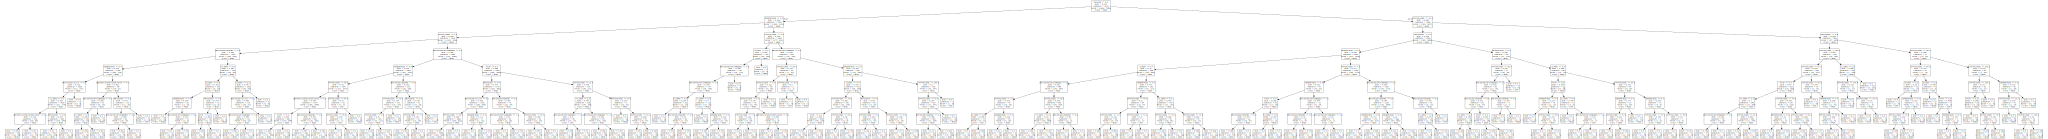

In [602]:
export_graphviz(classification_tree_ohDfPractice, 
                out_file = "classification_tree_ohDfPractice.dot", 
                feature_names = x_train.columns,
                class_names= ['Low', 'High'])

with open("classification_tree_ohDfPractice.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [603]:
pred = classification_tree_ohDfPractice.predict(x_test)

In [606]:
cm = pd.DataFrame(confusion_matrix(y_test, pred).T,
                  index = ['No', 'Yes'], 
                  columns = ['No', 'Yes'])

In [607]:
print(cm)

      No   Yes
No     8    19
Yes  417  1742


In [608]:
(8+1742)/(8+19+417+1742) #performance on test data

0.8005489478499542

In [609]:
ohDfPractice.columns

Index(['is_open', 'review_count', 'stars', 'Alcohol', 'BikeParking',
       'BusinessAcceptsCreditCards', 'GoodForKids', 'NoiseLevel',
       'RestaurantsAttire', 'RestaurantsPriceRange2', 'RestaurantsTakeOut',
       'WiFi', 'Parking'],
      dtype='object')

In [611]:
#Index(['is_open', 'review_count', 'stars', 'Alcohol', 'BikeParking',
#       'BusinessAcceptsCreditCards', 'GoodForKids', 'NoiseLevel',
 #      'RestaurantsAttire', 'RestaurantsPriceRange2', 'RestaurantsTakeOut',
  #     'WiFi', 'Parking']''' #these are the columns I am using 

### Regression Tree Model 

In [641]:
regr_tree_ohDfPractice = DecisionTreeRegressor(max_depth = 2)
regr_tree_ohDfPractice.fit(x_train, y_train)
predRegr = regr_tree_ohDfPractice.predict(x_test)

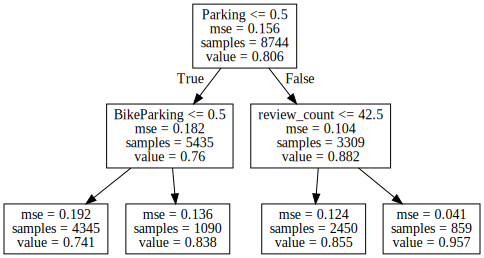

In [642]:
export_graphviz(regr_tree_ohDfPractice, 
                out_file = "regr_tree_ohDfPractice.dot", 
                feature_names = x_train.columns)

with open("regr_tree_ohDfPractice.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [643]:
plt.scatter(predRegr, 
            y_test, 
            label = 'stars')

plt.plot([0, 1], 
         [0, 1], 
         '--k', 
         transform = plt.gca().transAxes)

plt.xlabel('predRegr')
plt.ylabel('y_test: stars')

mse = mean_squared_error(y_test, predRegr)

In [644]:
mse 

0.15171590989314993

In [645]:
math.sqrt(mse)

0.3895072655203622

### Random Forest Model 

In [648]:
# Random forests: using 6 features
random_forest_ohDfPractice = RandomForestRegressor(max_features = 6, random_state = 1)

random_forest_ohDfPractice.fit(x_train, y_train)

predRandForest = random_forest_ohDfPractice.predict(x_test)
randForestMse = mean_squared_error(y_test, predRandForest)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [649]:
print(randForestMse)
print(math.sqrt(randForestMse))

0.173300937507
0.41629429194572937


In [650]:
Importance = pd.DataFrame({'Importance':random_forest_ohDfPractice.feature_importances_*100}, 
                          index = x.columns)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

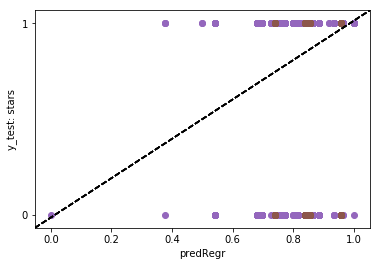

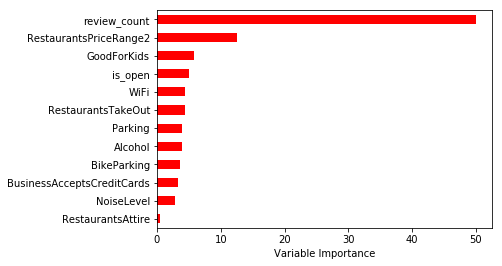

In [651]:
plt.show() #clearly regrssion doesn't make sense??